In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [3]:
df = pd.read_csv("property_data.csv")
print(df.head())


    BedRooms   Bath rooms  Size_sqft  location  year built  Garage Available  \
0         3.0         1.0       1149     Rural        2004               NaN   
1         NaN         2.0       1169     Rural        1989               1.0   
2         4.0         3.0       1409  Suburban        1993               1.0   
3         3.0         3.0       1647  Suburban        2021               0.0   
4         2.0         3.0       1865     Urban        2009               0.0   

    Furnishing House Condition  Has_Pool  Lot Size  Price($)  
0  Unfurnished             new       0.0      0.15    244043  
1          NaN             Old       0.0      0.23    211250  
2  Unfurnished              gd       0.0      0.19    257239  
3          NaN             new       0.0      0.27    310316  
4     furnised             old       1.0      0.39    334791  


In [4]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    BedRooms         954 non-null    float64
 1   Bath rooms        941 non-null    float64
 2   Size_sqft         1000 non-null   int64  
 3   location          1000 non-null   object 
 4   year built        1000 non-null   int64  
 5   Garage Available  896 non-null    float64
 6   Furnishing        843 non-null    object 
 7   House Condition   1000 non-null   object 
 8   Has_Pool          945 non-null    float64
 9   Lot Size          1000 non-null   float64
 10  Price($)          1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB
None


In [5]:
print(df.describe())

        BedRooms   Bath rooms    Size_sqft  year built  Garage Available  \
count  954.000000  941.000000  1000.000000  1000.00000        896.000000   
mean     2.912998    1.989373  1505.170000  2001.59500          0.533482   
std      1.161547    0.836592   391.257815    12.42511          0.499156   
min      1.000000    1.000000   292.000000  1980.00000          0.000000   
25%      2.000000    1.000000  1241.750000  1991.00000          0.000000   
50%      3.000000    2.000000  1500.000000  2002.00000          1.000000   
75%      4.000000    3.000000  1769.000000  2012.00000          1.000000   
max      5.000000    4.000000  2777.000000  2023.00000          1.000000   

         Has_Pool    Lot Size       Price($)  
count  945.000000  1000.00000    1000.000000  
mean     0.280423     0.25540  277133.174000  
std      0.449444     0.13628   59963.752729  
min      0.000000     0.00000   87752.000000  
25%      0.000000     0.15000  236922.250000  
50%      0.000000     0.25000  27

In [18]:
# cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)


In [19]:
# handling missing values
print(df.isnull().sum())
# numeric data filled with median
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median())
# categorical columns filled with mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])



bedrooms            0
bath_rooms          0
size_sqft           0
location            0
year_built          0
garage_available    0
furnishing          0
house_condition     0
has_pool            0
lot_size            0
price               0
dtype: int64


In [20]:
# standardizing categorical values
df['furnishing'] = df['furnishing'].str.strip().str.lower()
df['furnishing'] = df['furnishing'].replace({
    'fully furnished': 'furnished',
    'furnised': 'furnished',
    'semi': 'semi-furnished'
})


In [23]:
# fixing data types
df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')
df['size_sqft'] = pd.to_numeric(df['size_sqft'], errors='coerce')
df['lot_size'] = pd.to_numeric(df['lot_size'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [26]:
# creating house age
current_year = datetime.now().year
df['house_age'] = current_year - df['year_built']

In [27]:
# saving clean data
df.to_csv("property_data_clean.csv", index=False)

In [29]:
# encoding categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df_encoded.head())

   bedrooms  bath_rooms  size_sqft  year_built  garage_available  has_pool  \
0       3.0         1.0       1149        2004               1.0       0.0   
1       3.0         2.0       1169        1989               1.0       0.0   
2       4.0         3.0       1409        1993               1.0       0.0   
3       3.0         3.0       1647        2021               0.0       0.0   
4       2.0         3.0       1865        2009               0.0       1.0   

   lot_size   price  house_age  location_Suburban  ...  location_sub-urban  \
0      0.15  244043         21              False  ...               False   
1      0.23  211250         36              False  ...               False   
2      0.19  257239         32               True  ...               False   
3      0.27  310316          4               True  ...               False   
4      0.39  334791         16              False  ...               False   

   location_urbn  furnishing_semi furnished  furnishing_semi-f

In [30]:
# split into features x and y
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [31]:
# test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
# training a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# making predictions
y_pred = model.predict(X_test)

In [35]:
# evaluating performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 9465.59
R² Score: 0.98


##### Visualization

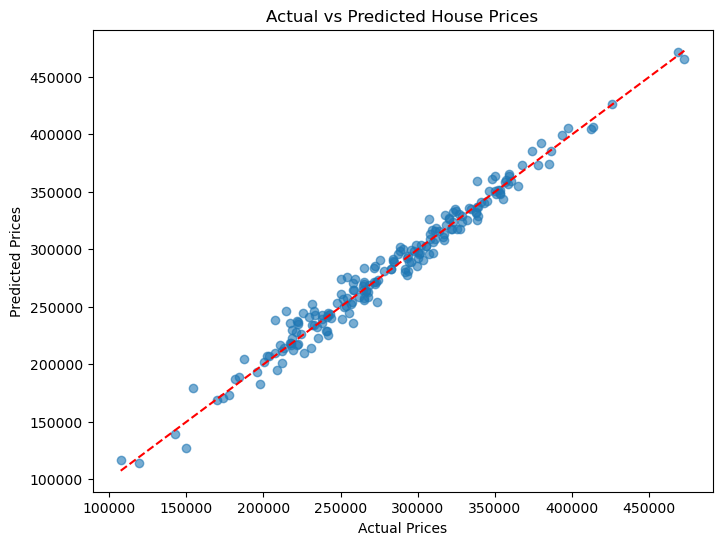

In [36]:
# predicted vs actual prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')  # perfect prediction line
plt.show()
